# Homework 1

## Problem 2 (The Numerical Square Root Finding Algorithm)
The goal of this problem is to give you a taste of iterative numerical conversion. The square root $\sqrt{a}$ for most positive real numbers $a$ are irrational numbers and is not easy to calculate. Since 1,500 BC, ancient Babylonians have been using the following iterative method to find square roots. The method works as follows:

Assume $x^{(0)}$ is the initial solution, say some random positive number. 

We then iteratively calculate the following sequence of solutions $x^{(1)},x^{(2)},\dots$, where each solution:
\begin{equation}
    x^{(j+1)}=\frac{1}{2}(x^{(j)}+\frac{a}{x^{(j)}})
\end{equation}
for $j=0,1,\dots$

### Part 1
Implement the above simple root finding algorithm using your favorite programming language (e.g., python, MATLAB, C, Java, etc.) and see if the algorithm works with some examples and compare the results from a calculator.

In [117]:
import math

def babylonian_sqrt(a, x0=1.0, tolerance=1e-10, 
                   max_iterations=100):
    x = x0
    for j in range(max_iterations):
        x_next = 0.5 * (x + a / x)
        if abs(x_next - x) < tolerance:
            return x_next, j + 1
        x = x_next
    return x, max_iterations

# Test cases comparing Babylonian method 
# with calculator
test_cases = [2, 3, 5, 10, 25, 50, 100]

print(f"{'Number':<8} {'Babylonian':<15} "
      f"{'Calculator':<15} {'Error':<12} "
      f"{'Iterations'}")
print("-" * 60)

for a in test_cases:
    result, iters = babylonian_sqrt(a)
    actual = math.sqrt(a)
    error = abs(result - actual)
    print(f"{a:<8} {result:<15.8f} "
          f"{actual:<15.8f} {error:<12.2e} "
          f"{iters}")

Number   Babylonian      Calculator      Error        Iterations
------------------------------------------------------------
2        1.41421356      1.41421356      2.22e-16     5
3        1.73205081      1.73205081      0.00e+00     6
5        2.23606798      2.23606798      0.00e+00     6
10       3.16227766      3.16227766      4.44e-16     7
25       5.00000000      5.00000000      0.00e+00     7
50       7.07106781      7.07106781      0.00e+00     8
100      10.00000000     10.00000000     0.00e+00     9


## Problem 5 (SVM via Python)
Consider the following simple labeled data sets in 2D space:

| **Point** | **Label** |
|-----------|-----------|
| (5, 0)    | +1        |
| (5, 2)    | +1        |
| (7, 7)    | -1        |
| (9, 6)    | -1        |
| (2, 0)    | -1        |

Find the optimal linear SVM for the datasets using Python and plot the data points and the classifier you find.


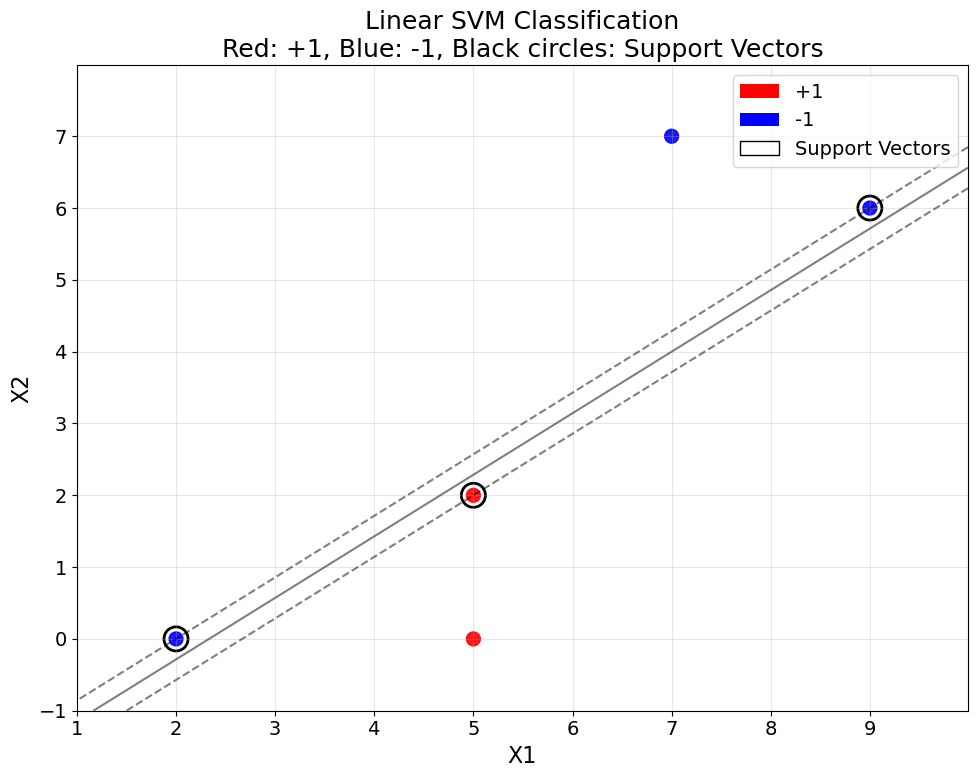

SVM Results:
Support vectors: [[9. 6.]
 [2. 0.]
 [5. 2.]]
Support vector indices: [3 4 1]
Coefficients (dual): [[-4.12376149 -6.49801838 10.62177987]]
Intercept: -6.9974
Weight vector w: [2.9990, -3.4990]
Decision boundary: 2.9990*x1 + -3.4990*x2 + -6.9974 = 0

Classification results:
Point [5 0]: True label =  1, Predicted =  1, Decision value =  7.998
Point [5 2]: True label =  1, Predicted =  1, Decision value =  1.000
Point [7 7]: True label = -1, Predicted = -1, Decision value = -10.497
Point [9 6]: True label = -1, Predicted = -1, Decision value = -1.000
Point [2 0]: True label = -1, Predicted = -1, Decision value = -0.999


In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Define the data points and labels
X = np.array([[5, 0], [5, 2], [7, 7], [9, 6], [2, 0]])
y = np.array([1, 1, -1, -1, -1])

# Create and train the SVM classifier
clf = svm.SVC(kernel='linear', C=1000)  # High C for hard margin
clf.fit(X, y)

# Create a mesh to plot the decision boundary
h = 0.01  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Set larger font sizes
plt.rcParams.update({'font.size': 14})

# Plot the decision boundary
plt.figure(figsize=(10, 8))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot data points
colors = ['red' if label == 1 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100, alpha=0.9)

# Highlight support vectors
support_vectors = clf.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
           s=300, facecolors='none', edgecolors='black', linewidth=2)

# Add labels and formatting with larger font sizes
plt.xlabel('X1', fontsize=16)
plt.ylabel('X2', fontsize=16)
plt.title('Linear SVM Classification\nRed: +1, Blue: -1, Black circles: Support Vectors', fontsize=18)
plt.grid(True, alpha=0.3)

# Increase tick label font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add legend with larger font
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', label='+1'),
                   Patch(facecolor='blue', label='-1'),
                   Patch(facecolor='none', edgecolor='black', label='Support Vectors')]
plt.legend(handles=legend_elements, fontsize=14)

plt.tight_layout()
plt.show()

# Print the SVM parameters
print("SVM Results:")
print(f"Support vectors: {clf.support_vectors_}")
print(f"Support vector indices: {clf.support_}")
print(f"Coefficients (dual): {clf.dual_coef_}")
print(f"Intercept: {clf.intercept_[0]:.4f}")

# Calculate and display the decision boundary equation
w = clf.coef_[0]
print(f"Weight vector w: [{w[0]:.4f}, {w[1]:.4f}]")
print(f"Decision boundary: {w[0]:.4f}*x1 + {w[1]:.4f}*x2 + {clf.intercept_[0]:.4f} = 0")

# Verify classification
print("\nClassification results:")
for i, (point, true_label) in enumerate(zip(X, y)):
    predicted = clf.predict([point])[0]
    decision_value = clf.decision_function([point])[0]
    print(f"Point {point}: True label = {true_label:2d}, "
          f"Predicted = {predicted:2d}, Decision value = {decision_value:6.3f}")

## Problem 6 (Least Squares Solvers via Python)
Use Python to solve the following optimization problems:
\begin{equation}
    \mathbf{x} = \begin{pmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
    x_4
    \end{pmatrix}, \quad
    \mathbf{A} = \begin{pmatrix}
    1 & 2 & 3 & 4 \\
    5 & 6 & 7 & 8 \\
    9 & 10 & 11 & 12
    \end{pmatrix}, \quad
    \mathbf{b} = \begin{pmatrix}
    13 \\
    14 \\
    15
    \end{pmatrix}
\end{equation}

### Part 1
$\min(Ax-b)^\top(Ax-b)$ or $\min {\lvert Ax-b \rvert}^2$.

In [119]:
import numpy as np

# Define matrix A and vector b
A = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8], 
              [9, 10, 11, 12]])

b = np.array([13, 14, 15])

# Solve least squares by hand: 
# x = (A^T A)^(-1) A^T b
AtA = A.T @ A
Atb = A.T @ b
x = np.linalg.inv(AtA) @ Atb

print("Solution x:")
print(x)
print(f"\nResidual ||Ax - b||^2: {np.linalg.norm(A @ x - b)**2:.6f}")

Solution x:
[-10.   4.   2.   4.]

Residual ||Ax - b||^2: 110.000000


### Part 2
$\min(Ax-b)^\top(Ax-b)$ such that $x \ge 0$.

In [120]:
import numpy as np
from scipy.optimize import nnls

# Define matrix A and vector b
A = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8], 
              [9, 10, 11, 12]])

b = np.array([13, 14, 15])

# Method 1: scipy's nnls (Lawson-Hanson algorithm)
x_scipy, residual_scipy = nnls(A, b)

# Method 2: Projected gradient descent (by hand)
x = np.zeros(A.shape[1])
AtA = A.T @ A
Atb = A.T @ b

for i in range(10000):  # More iterations
    grad = 2 * (AtA @ x - Atb)
    alpha = 0.001  # Smaller step size
    x_new = x - alpha * grad
    x_new = np.maximum(0, x_new)
    
    if np.linalg.norm(x_new - x) < 1e-10:
        break
    x = x_new

print("scipy nnls solution:")
print(x_scipy)
print(f"Residual: {residual_scipy**2:.6f}")

print("\nProjected gradient descent:")
print(x)
print(f"Residual: {np.linalg.norm(A @ x - b)**2:.6f}")

print(f"\nDifference in solutions: {np.linalg.norm(x_scipy - x):.6f}")

scipy nnls solution:
[0.         0.         0.         1.53571429]
Residual: 61.714286

Projected gradient descent:
[0.         0.         0.         1.53571429]
Residual: 61.714286

Difference in solutions: 0.000000


## Problem 7 (Linear programming)
UNM CS Lab orders computers from two vendors Apple and Dell. Each semester, at least 10 computers must be ordered. A computer from Dell costs 2300 USD each, and a computer from Apple costs 600 USD each. (Yep, Apple is cheaper because it is using its own silicon. Dell is more expensive because it must equip with a discrete graphics card.) Costs must be kept to less than 10,000 USD (because it comes from the course fees). Moreover, UNM requires that the number of computers from each Vendor can’t exceed twice the number from another. How many computers UNM CS must order from each vendor to minimize the total cost subject to the above constraints? Show that how this problem can be modeled using linear programming. Solve your linear program either via Matlab or Python. Did you notice any issues? Can you explain what causes the issue?

In [121]:
import numpy as np
from scipy.optimize import linprog

# Variables: x = Apple computers, y = Dell computers
# Objective: minimize 600x + 2300y

# Coefficients for objective function (minimize)
c = [600, 2300]

# Inequality constraints: Ax <= b
# Convert constraints to standard form (Ax <= b):
# 1. -(x + y) <= -10  (at least 10 computers)
# 2. 600x + 2300y <= 9999  (less than 10,000, using 9999 for strict inequality)
# 3. x - 2y <= 0  (Apple <= 2*Dell)
# 4. y - 2x <= 0  (Dell <= 2*Apple)

A = [[-1, -1],      # -(x + y) <= -10
     [600, 2300],   # 600x + 2300y <= 9999
     [1, -2],       # x - 2y <= 0
     [-2, 1]]       # -2x + y <= 0

b = [-10, 9999, 0, 0]

# Bounds for variables (non-negative)
x_bounds = (0, None)
y_bounds = (0, None)

# Solve
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

print("Optimization Result:")
print(f"Status: {result.message}")
print(f"Success: {result.success}")

if result.success and result.x is not None:
    print(f"Apple computers: {result.x[0]:.2f}")
    print(f"Dell computers: {result.x[1]:.2f}")
    print(f"Minimum cost: ${result.fun:.2f}")
    x, y = result.x
else:
    print("PROBLEM IS INFEASIBLE!")
    print("\nLet's analyze why...")
    
    # Check feasibility manually
    print("\nAnalyzing constraints:")
    print("Case 1: x = y (equal numbers)")
    print("  Need: 2x >= 10, so x >= 5")
    print("  Budget: 600x + 2300x = 2900x < 10000, so x < 3.45")
    print("  IMPOSSIBLE: Need x >= 5 but budget allows x < 3.45")
    
    print("\nCase 2: x = 2y (Apple = 2*Dell)")  
    print("  Need: 3y >= 10, so y >= 3.33")
    print("  Budget: 1200y + 2300y = 3500y < 10000, so y < 2.86")
    print("  IMPOSSIBLE: Need y >= 3.33 but budget allows y < 2.86")
    
    print("\nCase 3: y = 2x (Dell = 2*Apple)")
    print("  Need: 3x >= 10, so x >= 3.33") 
    print("  Budget: 600x + 4600x = 5200x < 10000, so x < 1.92")
    print("  IMPOSSIBLE: Need x >= 3.33 but budget allows x < 1.92")
    
    x, y = 0, 0  # Set dummy values for rest of code
if result.success and result.x is not None:
    print(f"\nConstraint verification:")
    print(f"Total computers: {x + y:.2f} >= 10? {x + y >= 10}")
    print(f"Total cost: ${600*x + 2300*y:.2f} < 10000? {600*x + 2300*y < 10000}")
    print(f"Apple <= 2*Dell: {x:.2f} <= {2*y:.2f}? {x <= 2*y}")
    print(f"Dell <= 2*Apple: {y:.2f} <= {2*x:.2f}? {y <= 2*x}")

    # Check for potential issues
    print(f"\n--- Potential Issues ---")
    if abs(600*x + 2300*y - 9999) < 1:
        print("WARNING: Solution is very close to the budget constraint boundary!")
        print("The strict inequality constraint (<10000) may cause issues in practice.")
        
    print(f"\nNote: The solution gives non-integer values, but computers must be whole units.")
    print(f"Rounded solution: {int(np.round(x))} Apple, {int(np.round(y))} Dell")

    # Check rounded solution
    x_round, y_round = int(np.round(x)), int(np.round(y))
    cost_round = 600*x_round + 2300*y_round
    print(f"Rounded cost: ${cost_round}")
    print(f"Rounded cost < 10000? {cost_round < 10000}")
else:
    print(f"\n--- Root Cause of Infeasibility ---")
    print("The budget constraint ($10,000) is too tight for the minimum quantity (10 computers)")
    print("and vendor ratio constraints (each vendor <= 2x the other).")
    print("\nTo make this feasible, either:")
    print("1. Increase budget to at least $10,150")
    print("2. Reduce minimum computers to 9 or fewer") 
    print("3. Relax the vendor ratio constraints")

Optimization Result:
Status: The problem is infeasible.
Success: False
PROBLEM IS INFEASIBLE!

Let's analyze why...

Analyzing constraints:
Case 1: x = y (equal numbers)
  Need: 2x >= 10, so x >= 5
  Budget: 600x + 2300x = 2900x < 10000, so x < 3.45
  IMPOSSIBLE: Need x >= 5 but budget allows x < 3.45

Case 2: x = 2y (Apple = 2*Dell)
  Need: 3y >= 10, so y >= 3.33
  Budget: 1200y + 2300y = 3500y < 10000, so y < 2.86
  IMPOSSIBLE: Need y >= 3.33 but budget allows y < 2.86

Case 3: y = 2x (Dell = 2*Apple)
  Need: 3x >= 10, so x >= 3.33
  Budget: 600x + 4600x = 5200x < 10000, so x < 1.92
  IMPOSSIBLE: Need x >= 3.33 but budget allows x < 1.92

--- Root Cause of Infeasibility ---
The budget constraint ($10,000) is too tight for the minimum quantity (10 computers)
and vendor ratio constraints (each vendor <= 2x the other).

To make this feasible, either:
1. Increase budget to at least $10,150
2. Reduce minimum computers to 9 or fewer
3. Relax the vendor ratio constraints


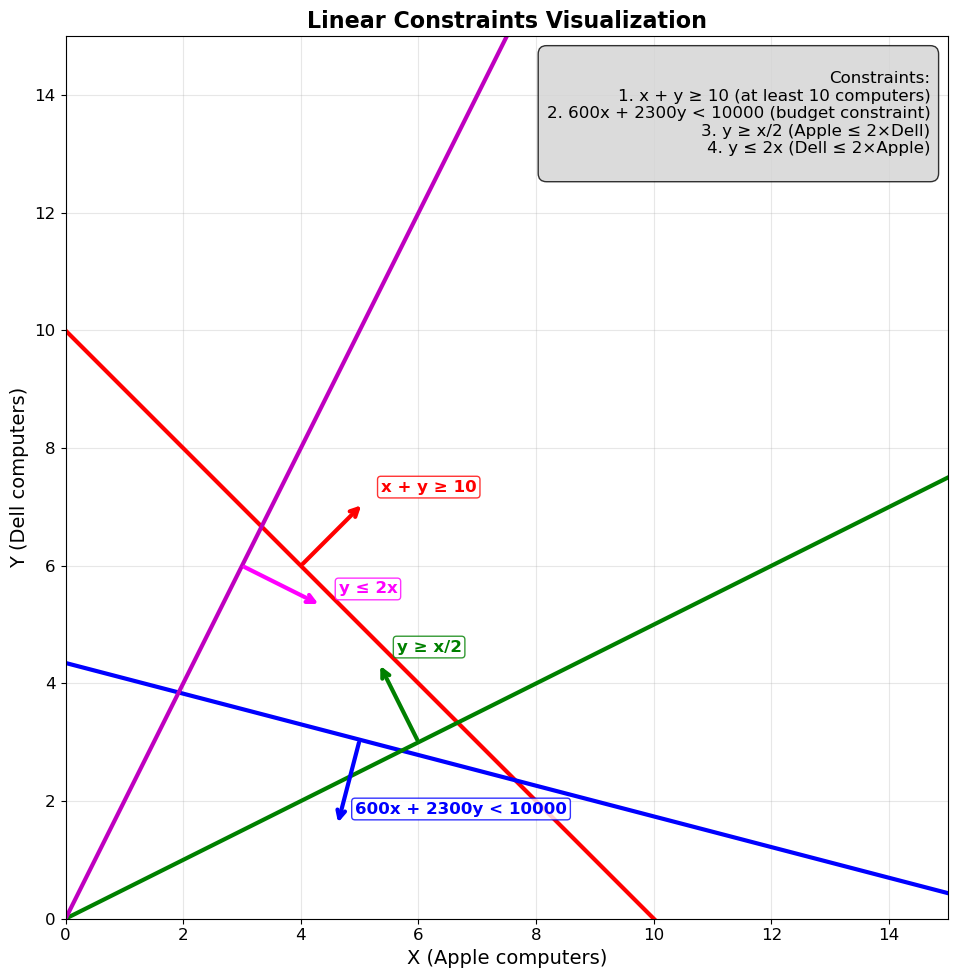

Corner Points of Feasible Region:


In [122]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Set up the plot
plt.figure(figsize=(10, 10))  # Square plot
plt.grid(True, alpha=0.3)
plt.xlabel('X (Apple computers)', fontsize=14)
plt.ylabel('Y (Dell computers)', fontsize=14)
plt.title('Linear Constraints Visualization', fontsize=16, fontweight='bold')

# Define x range for plotting
x = np.linspace(0, 20, 400)

# Constraint 1: x + y >= 10 (region ABOVE the line y = 10 - x)
y1 = 10 - x
plt.plot(x, y1, 'r-', linewidth=3, label='x + y = 10 (x + y ≥ 10)')

# Constraint 2: 600x + 2300y < 10000 (region BELOW the line)
# Rearrange to y < (10000 - 600x) / 2300
y2 = (10000 - 600*x) / 2300
plt.plot(x, y2, 'b-', linewidth=3, label='600x + 2300y = 10000 (600x + 2300y < 10000)')

# Constraint 3: y >= x/2 (region ABOVE the line y = x/2)
y3 = x / 2
plt.plot(x, y3, 'g-', linewidth=3, label='y = x/2 (y ≥ x/2)')

# Constraint 4: y <= 2x (region BELOW the line y = 2x)
y4 = 2 * x
plt.plot(x, y4, 'm-', linewidth=3, label='y = 2x (y ≤ 2x)')

# Add perpendicular arrows to show constraint gradients
def add_perpendicular_arrow(x_pos, y_pos, gradient, color, constraint_text, scale=1.0):
    """Add an arrow perpendicular to the constraint line showing gradient direction"""
    # Normalize the gradient vector for consistent arrow length
    grad_magnitude = np.sqrt(gradient[0]**2 + gradient[1]**2)
    grad_normalized = (gradient[0]/grad_magnitude * scale, gradient[1]/grad_magnitude * scale)
    
    plt.annotate('', 
                xy=(x_pos + grad_normalized[0], y_pos + grad_normalized[1]), 
                xytext=(x_pos, y_pos),
                arrowprops=dict(arrowstyle='->', color=color, lw=3))
    
    # Add text label slightly offset from arrow tip
    plt.text(x_pos + grad_normalized[0] + 0.3, y_pos + grad_normalized[1] + 0.2, 
             constraint_text, color=color, fontweight='bold', fontsize=12,
             bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8, edgecolor=color))

# For each constraint ax + by ≥ c, the gradient is (a, b)
# For ≤ constraints, we use the negative gradient to show feasible direction

# Constraint 1: x + y ≥ 10, gradient = (1, 1)
add_perpendicular_arrow(4, 6, (1, 1), 'red', 'x + y ≥ 10', scale=1.5)

# Constraint 2: 600x + 2300y < 10000, gradient = (600, 2300), but feasible direction is opposite
# So we use (-600, -2300) normalized
add_perpendicular_arrow(5, 3.04, (-600, -2300), 'blue', '600x + 2300y < 10000', scale=1.5)

# Constraint 3: y ≥ x/2, rearranged: -x + 2y ≥ 0, gradient = (-1, 2)
add_perpendicular_arrow(6, 3, (-1, 2), 'green', 'y ≥ x/2', scale=1.5)

# Constraint 4: y ≤ 2x, rearranged: -2x + y ≤ 0, feasible direction is opposite to gradient
# Gradient of -2x + y = 0 is (-2, 1), so feasible direction is (2, -1)
add_perpendicular_arrow(3, 6, (2, -1), 'magenta', 'y ≤ 2x', scale=1.5)

# Find and highlight the feasible region (intersection of all constraints)
# We need to find the region where all constraints are satisfied simultaneously
x_feasible = np.linspace(0, 20, 1000)
y_min = np.maximum(10 - x_feasible, x_feasible / 2)  # max of constraint 1 and 3 lower bounds
y_max = np.minimum((10000 - 600*x_feasible) / 2300, 2*x_feasible)  # min of constraint 2 and 4 upper bounds

# Only plot where y_min <= y_max (feasible region exists)
feasible_mask = y_min <= y_max
if np.any(feasible_mask):
    x_feas = x_feasible[feasible_mask]
    y_min_feas = y_min[feasible_mask]
    y_max_feas = y_max[feasible_mask]
    
    plt.fill_between(x_feas, y_min_feas, y_max_feas, 
                     alpha=0.4, color='yellow', 
                     label='Feasible Region (all constraints)')

# Find corner points of the feasible region
corner_points = []

# Intersection of constraint 1 and 3: x + y = 10 and y = x/2
# x + x/2 = 10 → 1.5x = 10 → x = 20/3, y = 10/3
x_corner = 20/3
y_corner = 10/3
if (600*x_corner + 2300*y_corner < 10000) and (y_corner <= 2*x_corner):
    corner_points.append((x_corner, y_corner))

# Intersection of constraint 1 and 2: x + y = 10 and 600x + 2300y = 10000
# From x + y = 10: y = 10 - x
# 600x + 2300(10 - x) = 10000
# 600x + 23000 - 2300x = 10000
# -1700x = -13000 → x = 130/17, y = 10 - 130/17 = 40/17
x_corner = 130/17
y_corner = 40/17
if (y_corner >= x_corner/2) and (y_corner <= 2*x_corner):
    corner_points.append((x_corner, y_corner))

# Intersection of constraint 2 and 4: 600x + 2300y = 10000 and y = 2x
# 600x + 2300(2x) = 10000
# 600x + 4600x = 10000
# 5200x = 10000 → x = 100/52 = 25/13, y = 50/13
x_corner = 25/13
y_corner = 50/13
if (x_corner + y_corner >= 10) and (y_corner >= x_corner/2):
    corner_points.append((x_corner, y_corner))

# Intersection of constraint 3 and 4: y = x/2 and y = 2x
# x/2 = 2x → x = 4x → x = 0, y = 0 (origin)
# Check if origin satisfies all constraints
if (0 + 0 >= 10):  # This fails, so origin is not feasible
    pass

# Plot corner points
for i, (x_pt, y_pt) in enumerate(corner_points):
    plt.plot(x_pt, y_pt, 'ko', markersize=8, markerfacecolor='yellow', 
             markeredgecolor='black', markeredgewidth=2)
    plt.annotate(f'({x_pt:.2f}, {y_pt:.2f})', 
                 (x_pt, y_pt), xytext=(5, 5), 
                 textcoords='offset points', fontsize=12, 
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Set axis limits and equal aspect ratio
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.gca().set_aspect('equal', adjustable='box')  # Equal scaling for x and y axes

# Increase tick label font size
plt.tick_params(axis='both', which='major', labelsize=12)

# Add legend
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Add constraint equations as text
constraint_text = """
Constraints:
1. x + y ≥ 10 (at least 10 computers)
2. 600x + 2300y < 10000 (budget constraint)
3. y ≥ x/2 (Apple ≤ 2×Dell)
4. y ≤ 2x (Dell ≤ 2×Apple)
"""
plt.text(0.98, 0.98, constraint_text, transform=plt.gca().transAxes, 
         verticalalignment='top', horizontalalignment='right', fontsize=12,
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

# Print corner points
print("Corner Points of Feasible Region:")
for i, (x_pt, y_pt) in enumerate(corner_points):
    print(f"Point {i+1}: ({x_pt:.3f}, {y_pt:.3f})")
    print(f"  Check constraints:")
    print(f"    x + y = {x_pt + y_pt:.3f} ≥ 10: {x_pt + y_pt >= 10}")
    print(f"    600x + 2300y = {600*x_pt + 2300*y_pt:.3f} < 10000: {600*x_pt + 2300*y_pt < 10000}")
    print(f"    y = {y_pt:.3f} ≥ x/2 = {x_pt/2:.3f}: {y_pt >= x_pt/2}")
    print(f"    y = {y_pt:.3f} ≤ 2x = {2*x_pt:.3f}: {y_pt <= 2*x_pt}")
    print()